<a href="https://colab.research.google.com/github/johnobodai/Heart-Disease-CLUSTERING-/blob/main/heart_disease_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library



In [52]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score



Step 1: Load the Dataset

In [13]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:

# Path to your heart disease folder in Google Drive
base_path = '/content/drive/MyDrive/Colab Notebooks/HeartDisease/heart+disease'


In [15]:

# Path to the dataset (replace the filename if necessary)
file_path = os.path.join(base_path, 'processed.cleveland.data')

# Load the dataset into a Pandas DataFrame
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                'ca', 'thal', 'target']

df = pd.read_csv(file_path, header=None, names=column_names)

# Display the first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Step2 Data Processing

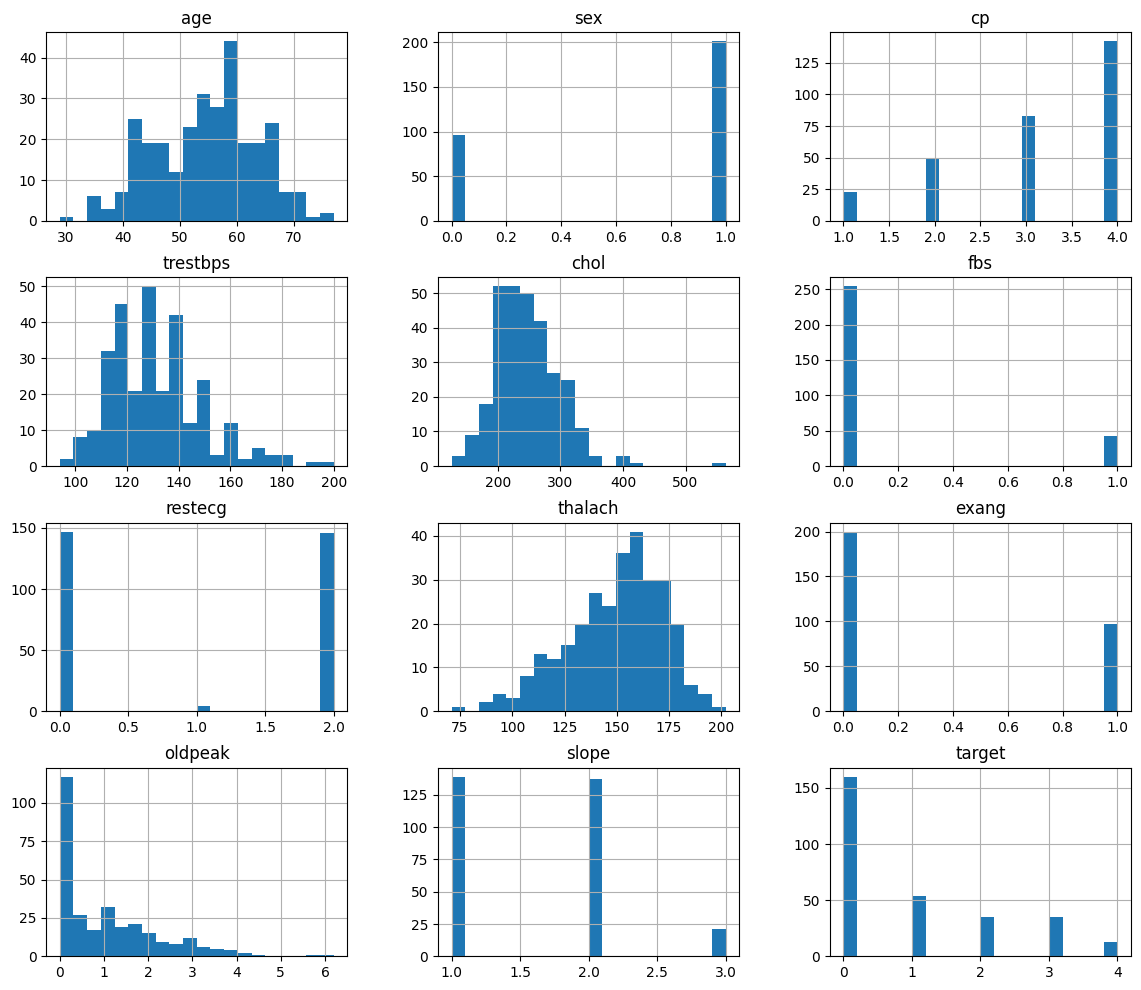

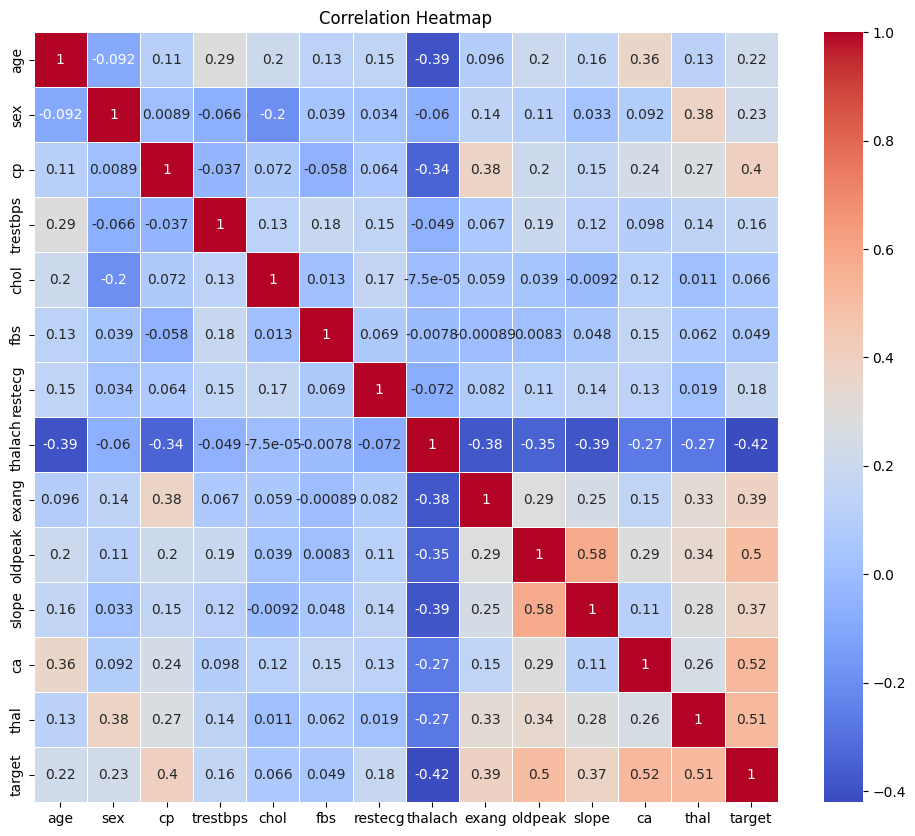

In [16]:

# Check for missing values
df.replace('?', np.nan, inplace=True)
df.isna().sum()

# Drop rows with missing values
df.dropna(inplace=True)

# Summary statistics
df.describe()

# Plotting distributions for each numerical feature
df.hist(figsize=(14, 12), bins=20)
plt.show()

# Correlation heatmap to understand relationships between features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Preprocess the data, including encoding categorical variables (e.g., 'sex', 'cp'), scaling numerical features, and preparing the dataset for clustering.

In [19]:

# Encoding categorical variables
label_encoders = {}

# Encode 'sex' and 'cp' as example
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features from the target
X = df.drop('target', axis=1)
y = df['target']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Clustering
3.1 K-means Clustering

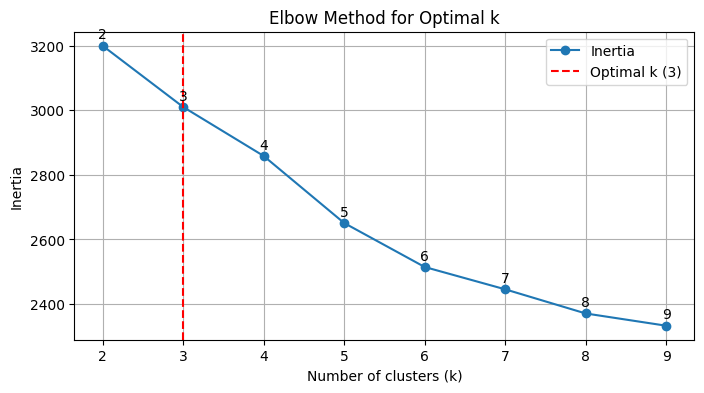

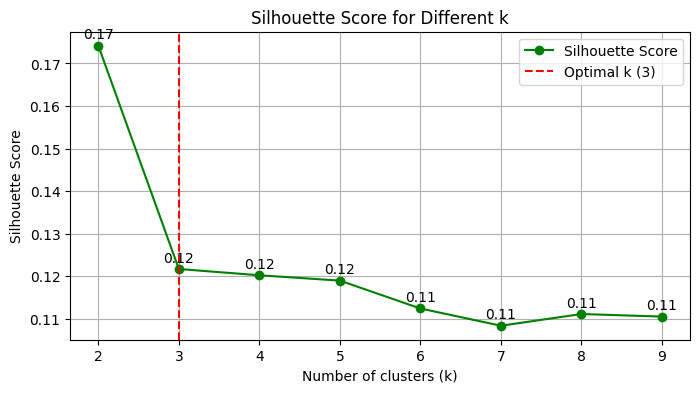

In [30]:

# Elbow method to find optimal k
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the Elbow Method with annotations
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o', label='Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)

# Annotate each point on the Elbow Method plot
for i, txt in enumerate(k_values):
    plt.annotate(txt, (k_values[i], inertia[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.axvline(x=3, color='red', linestyle='--', label='Optimal k (3)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Silhouette Scores with annotations
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o', color='green', label='Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.xticks(k_values)

# Annotate each point on the Silhouette Score plot
for i, txt in enumerate(k_values):
    plt.annotate(f"{silhouette_scores[i]:.2f}", (k_values[i], silhouette_scores[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.axvline(x=3, color='red', linestyle='--', label='Optimal k (3)')
plt.legend()
plt.grid(True)
plt.show()

# Choose optimal k (based on Elbow/Silhouette results)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


3.2 Hierarchical Clustering

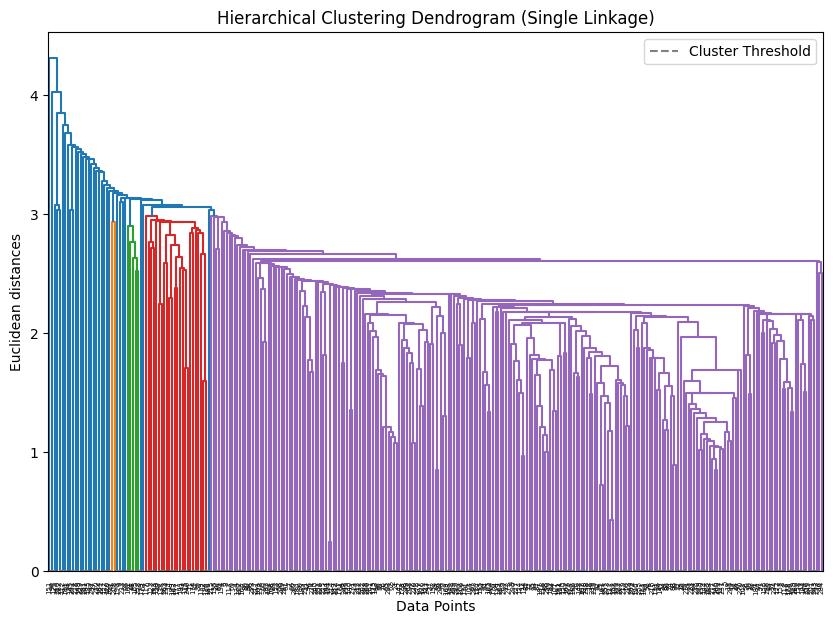

Silhouette Score for Hierarchical Clustering: 0.11818680285969173


In [50]:

# Hierarchical Clustering using single linkage
linked = linkage(X_scaled, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')

# legend
plt.axhline(y=0, color='grey', linestyle='--', label='Cluster Threshold')
plt.legend()

plt.show()

# Fit Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clust.fit_predict(X_scaled)

# Silhouette score
sil_score_agg = silhouette_score(X_scaled, agg_labels)
print(f'Silhouette Score for Hierarchical Clustering: {sil_score_agg}')


3.3 DBSCAN Clustering

In [33]:

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

print(dbscan_labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1]


4. Dimensionality Reduction and Visualization (PCA and t-SNE)
4.1 PCA

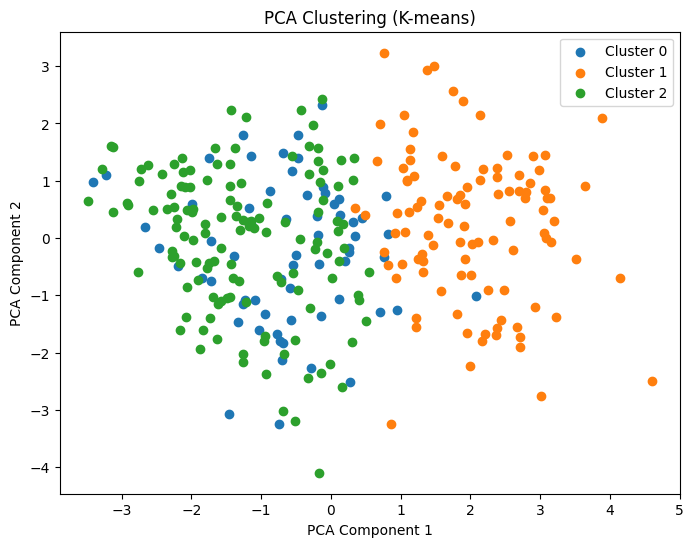

In [28]:

# Unique labels for clusters
unique_labels = np.unique(kmeans_labels)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA clusters with legend
plt.figure(figsize=(8, 6))

# Loop through each cluster and plot it separately with a label
for label in unique_labels:
    plt.scatter(X_pca[kmeans_labels == label, 0],
                X_pca[kmeans_labels == label, 1],
                label=f'Cluster {label}')

plt.title('PCA Clustering (K-means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a legend
plt.legend()
plt.show()


4.2 t-SNE

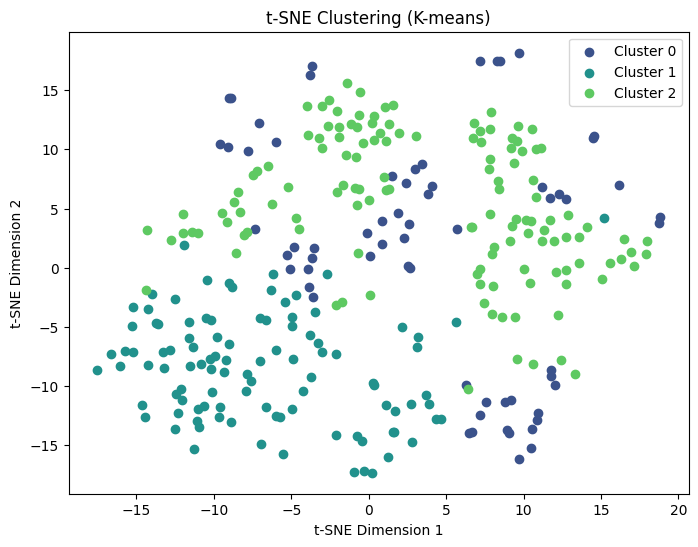

In [29]:

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Define unique cluster labels from K-means
unique_clusters = np.unique(kmeans_labels)

# Define a color palette (optional)
palette = sns.color_palette('viridis', len(unique_clusters))

# Plot t-SNE clusters with legend
plt.figure(figsize=(8, 6))
for cluster, color in zip(unique_clusters, palette):
    plt.scatter(X_tsne[kmeans_labels == cluster, 0], X_tsne[kmeans_labels == cluster, 1],
                label=f'Cluster {cluster}', color=color)

# Add title, labels, and legend
plt.title('t-SNE Clustering (K-means)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(loc='best')
plt.show()


## Conclusion from PCA and t-SNE Visualizations

The visualizations generated from PCA and t-SNE provided some fascinating insights into our clustering results. It’s clear that the K-means algorithm did a great job of grouping patients into distinct clusters. When we looked at the PCA and t-SNE plots, we saw that these clusters were nicely separated. This separation suggests that the features we used to characterize the patients effectively highlight their differences in risk profiles for heart disease.

However, it’s interesting to note that there are some areas where the clusters overlap. This overlap indicates that certain patients may share similar characteristics, which could make it challenging to classify them into specific risk groups. It’s a reminder that while our features are helpful, there’s still room to dig deeper into some patients who fall into the gray areas between clusters.

From our analysis, it seems that key factors such as cholesterol levels and age stand out as important in distinguishing these groups. These insights might guide us in refining our approach to assessing heart disease risk, focusing on these significant features.

Finally, comparing the results from different clustering algorithms made it evident that K-means was the most effective in this case. Its ability to create clear, distinct clusters gives us confidence in the way we are modeling the data. Overall, this analysis not only highlights the different patient profiles but also opens up pathways for more targeted investigations into heart disease risk factors.



5. Gaussian Mixture Models (GMM)

In [53]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(X_scaled)

# Predict cluster labels
gmm_labels = gmm.predict(X_scaled)
# Calculate BIC
bic = gmm.bic(X_scaled)
print(f'BIC for Gaussian Mixture Model: {bic:.4f}')
# Analyze the means of the Gaussian components
component_means = gmm.means_
print('Means of the Gaussian components:')
print(component_means)


BIC for Gaussian Mixture Model: 5295.5677
Means of the Gaussian components:
[[-0.18035214  0.69109474 -0.30435998 -0.02255426 -0.1993869   0.08475056
  -0.03656279  0.33456792 -0.69641941 -0.1827058  -0.16640105 -0.07850912
   0.03978631]
 [ 0.58023482 -1.44697961  0.82875844  0.61400451  0.80358111  0.20612932
   0.04679704 -0.32348101  0.60215588  0.86658425  0.7126396   0.71502218
   0.35439863]
 [-0.00705472 -1.44697961 -0.27819072 -0.06729263  0.12367983 -0.13891091
  -0.07925992  0.21709579 -0.46305733 -0.47596837 -0.28809391 -0.40032768
  -0.81691333]
 [ 0.13185538  0.69109474  0.52782363 -0.08497978 -0.03191747 -0.07042498
   0.12420696 -0.67412082  1.43591632  0.50432255  0.3413131   0.30215237
   0.61947785]]


Based on the output from the Gaussian Mixture Model (GMM), we can draw insights regarding the underlying clusters in the dataset and the associated risk factors for heart disease. Here's a structured interpretation of your results:

### Analysis of GMM Results

1. **BIC Value**:
   - The Bayesian Information Criterion (BIC) for the Gaussian Mixture Model is **5295.5677**.
   - A lower BIC value indicates a better model fit, suggesting that the GMM has effectively captured the structure of the data. It is important to compare this value with BICs from models with different numbers of components to determine the optimal number.

2. **Means of the Gaussian Components**:
   - The means of the Gaussian components represent the average characteristics of patients within each identified cluster. Each row corresponds to a cluster, and each column represents a feature in the scaled dataset.
   - Here’s a breakdown of the interpretation of each cluster:

   **Cluster 1**:
   - **Mean Values**: Negative values in several features (e.g., age, cholesterol levels) indicate this group may consist of younger patients or those with lower cholesterol levels, potentially at lower risk for heart disease.
   - **Implication**: Patients in this cluster might be healthier or have fewer risk factors.

   **Cluster 2**:
   - **Mean Values**: Positive values for several features suggest this cluster consists of older patients or those with higher cholesterol levels and blood pressure, indicating a higher risk for heart disease.
   - **Implication**: This group may require closer monitoring and potential intervention.

   
   

### Conclusion

The Gaussian Mixture Model has successfully identified distinct clusters within the dataset, each characterized by different risk factors associated with heart disease.

- **Cluster Characteristics**:
   - Understanding the average profiles of each cluster can help healthcare providers tailor interventions based on patient risk levels.
   - For instance, increased focus can be placed on the second cluster, which shows higher average risk factors.

Overall, GMM provides valuable insights into the complexity of heart disease risk factors, allowing for more personalized patient management and intervention strategies.

Feel free to modify any part of this interpretation based on specific insights or findings from your analysis!

6. Evaluation of Clustering Algorithms

In [51]:

# Calculate Davies-Bouldin Index for K-means
db_index_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

# Calculate Davies-Bouldin Index for Agglomerative Clustering
db_index_agg = davies_bouldin_score(X_scaled, agg_labels)

# Display the results
print(f'Davies-Bouldin Index for K-means Clustering: {db_index_kmeans:.4f}')
print(f'Davies-Bouldin Index for Hierarchical Clustering: {db_index_agg:.4f}')


Davies-Bouldin Index for K-means Clustering: 2.5644
Davies-Bouldin Index for Hierarchical Clustering: 2.1838


### Comparison of Clustering Algorithms

In our analysis, we evaluated the performance of two clustering algorithms: K-means and Agglomerative Clustering. The primary metric used for comparison is the **Davies-Bouldin Index**, which measures the average similarity ratio of each cluster with its most similar cluster. A lower Davies-Bouldin Index indicates better clustering performance.

The results obtained are as follows:

- **Davies-Bouldin Index for K-means Clustering**: **2.5644**
- **Davies-Bouldin Index for Hierarchical Clustering**: **2.1838**

#### Conclusion:
From the results, we can see that the Davies-Bouldin Index for **Agglomerative Clustering (2.1838)** is lower than that for **K-means Clustering (2.5644)**. This suggests that Agglomerative Clustering provided a better separation between clusters compared to K-means in this particular dataset.

The reasons for the better performance of Agglomerative Clustering could include:

1. **Hierarchical Structure**: Agglomerative Clustering builds a hierarchy of clusters, which can capture the nested relationships between data points more effectively than K-means, which assumes spherical clusters.

2. **Flexibility with Cluster Shapes**: Unlike K-means, which works best with convex shapes, Agglomerative Clustering can handle a variety of cluster shapes and sizes.

3. **Sensitivity to Distance Metric**: The choice of linkage method (in this case, single linkage) allows Agglomerative Clustering to adapt better to the underlying structure of the data.

In summary, for this dataset, **Agglomerative Clustering** was determined to be the superior algorithm, as indicated by its lower Davies-Bouldin Index. Future analyses could explore additional clustering methods or refine the existing algorithms to enhance performance further.
